# Support Vector Machines (SVM)

In questo laboratorio vedremo come:
1. Allenare una SVM
2. Analizzare come il parametro di costo influenza una SVM
3. Visualizzare un SVM
4. Usare l'SVM su un test set


Per prima cosa, carichiamo il dataset **Iris**.

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load the iris dataset
iris = load_iris()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=0)

Effettuiamo il training della SVM

In [2]:
from sklearn import svm

clf = svm.SVC(kernel='linear', random_state=42, C=1000000)

clf.fit(X_train, y_train)

SVC(C=1000000, kernel='linear', random_state=42)

In [3]:
print(f"Number of support vectors: {clf.support_vectors_.shape[0]}")

Number of support vectors: 12


Proviamo a considerare solo le classi Setosa e Virginica. Facciamo il training della SVM e plottiamo le istanze su uno scatter plot, assieme alla retta separatrice dell SVM

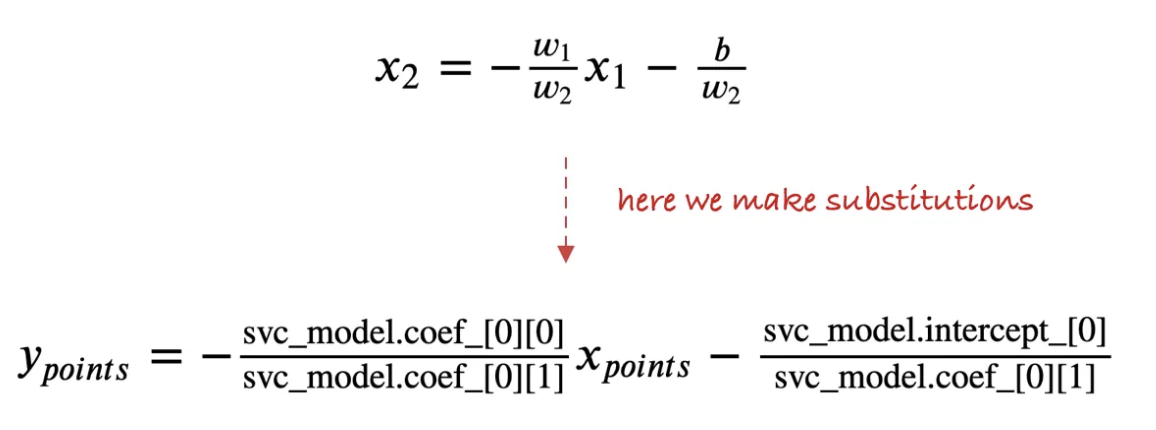

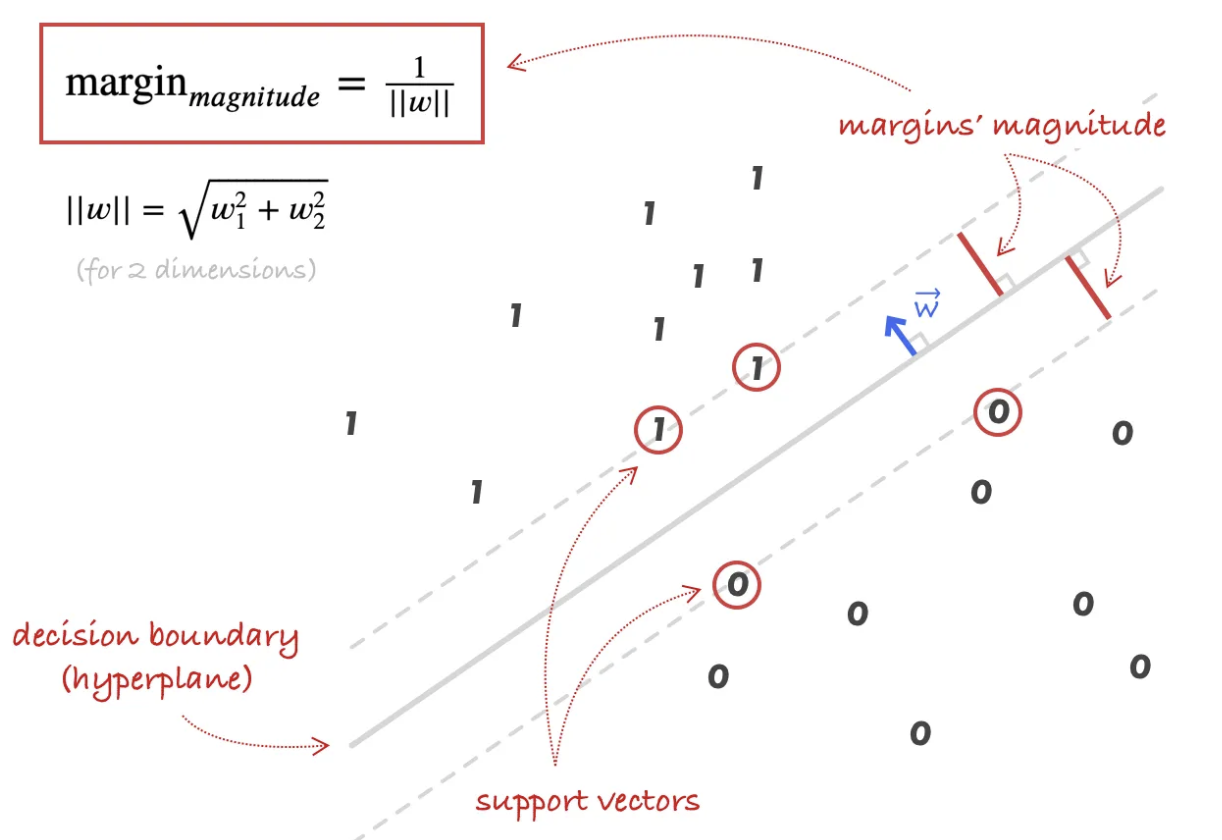

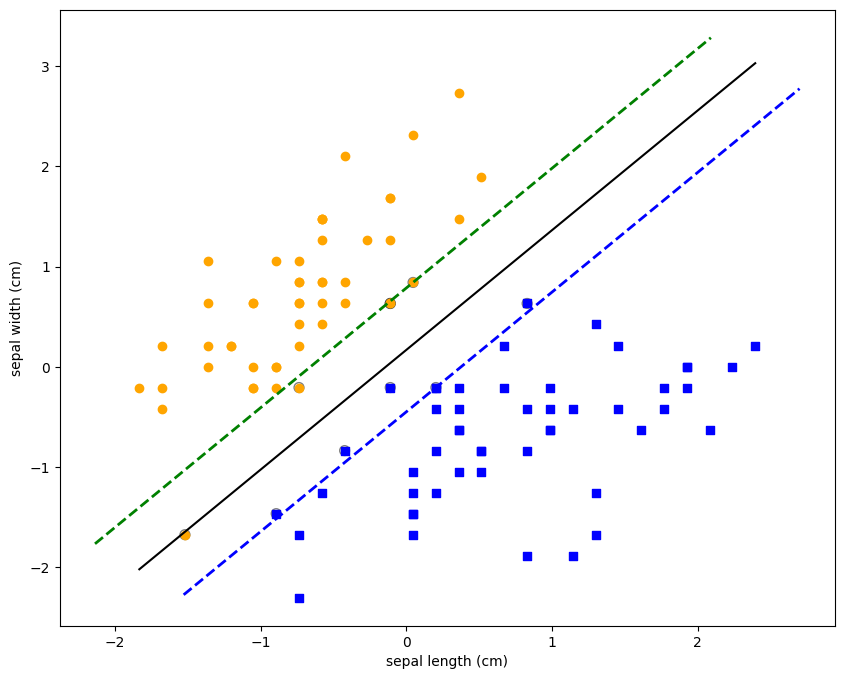

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Selezioniamo solo le prime due features (lunghezza e larghezza del sepalo)
X = iris.data[:, :2]
y = iris.target

# Selezioniamo solo le istanze appartenenti alle classi Setosa e Virginica
X = X[np.logical_or(y == 0, y == 1)]
y = y[np.logical_or(y == 0, y == 1)]

# Normalizzazione delle features
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Addestramento della SVM
C = 1  # parametro di regolarizzazione
svc = svm.SVC(kernel='linear', C=C).fit(X, y)

# Calcolo della retta separatrice
w = svc.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(X[:, 0].min(), X[:, 0].max())
yy = a * xx - (svc.intercept_[0]) / w[1]

plt.figure(figsize=(10, 8))

# Encircle support vectors
plt.scatter(svc.support_vectors_[:, 0],
            svc.support_vectors_[:, 1],
            s=50,
            facecolors='none',
            edgecolors='k',
            alpha=.5);

# Calcolo del margine
w_hat = svc.coef_[0] / (np.sqrt(np.sum(svc.coef_[0] ** 2)))
margin = 1 / np.sqrt(np.sum(svc.coef_[0] ** 2))
decision_boundary_points = np.array(list(zip(xx, yy)))
points_of_line_above = decision_boundary_points + w_hat * margin
points_of_line_below = decision_boundary_points - w_hat * margin
plt.plot(points_of_line_above[:, 0],
         points_of_line_above[:, 1],
         'b--',
         linewidth=2)

plt.plot(points_of_line_below[:, 0],
         points_of_line_below[:, 1],
         'g--',
         linewidth=2)


# Plotting dello scatter plot e della retta separatrice
colors = ['orange', 'blue']
markers = ['o', 's']
for i, color, marker in zip([0, 1], colors, markers):
    plt.scatter(X[y == i, 0], X[y == i, 1], color=color, marker=marker)

plt.plot(xx, yy, 'k-')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

Cosa succede se impostiamo C=1000000?

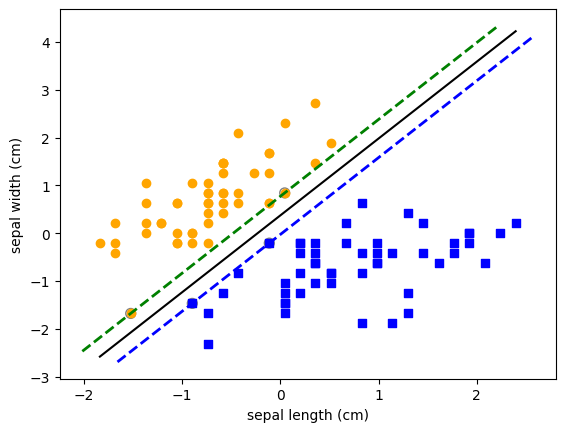

In [5]:
# Addestramento della SVM
C = 1000000  # parametro di regolarizzazione
svc = svm.SVC(kernel='linear', C=C).fit(X, y)

# Calcolo della retta separatrice
w = svc.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(X[:, 0].min(), X[:, 0].max())
yy = a * xx - (svc.intercept_[0]) / w[1]

# Encircle support vectors
plt.scatter(svc.support_vectors_[:, 0],
            svc.support_vectors_[:, 1],
            s=50,
            facecolors='none',
            edgecolors='k',
            alpha=.5);

# Calcolo del margine
w_hat = svc.coef_[0] / (np.sqrt(np.sum(svc.coef_[0] ** 2)))
margin = 1 / np.sqrt(np.sum(svc.coef_[0] ** 2))
decision_boundary_points = np.array(list(zip(xx, yy)))
points_of_line_above = decision_boundary_points + w_hat * margin
points_of_line_below = decision_boundary_points - w_hat * margin
plt.plot(points_of_line_above[:, 0],
         points_of_line_above[:, 1],
         'b--',
         linewidth=2)

plt.plot(points_of_line_below[:, 0],
         points_of_line_below[:, 1],
         'g--',
         linewidth=2)


# Plotting dello scatter plot e della retta separatrice
colors = ['orange', 'blue']
markers = ['o', 's']
for i, color, marker in zip([0, 1], colors, markers):
    plt.scatter(X[y == i, 0], X[y == i, 1], color=color, marker=marker)

plt.plot(xx, yy, 'k-')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

Andiamo a rieffettuare il training sull'intero dataset Iris ed effettuiamo la predizione sul test set

In [6]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Crea il classificatore SVM
clf = svm.SVC(kernel='linear', C=1000000, random_state=0)

# Addestra il classificatore
clf.fit(X_train, y_train)

# Effettua le predizioni sul test set
y_pred = clf.predict(X_test)

# Calcola l'accuratezza del modello
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuratezza: {accuracy}\n\n")
print(classification_report(y_test, y_pred))
print("\n\nConfusion matrix:\n", confusion_matrix(y_test, y_pred))

Accuratezza: 0.9666666666666667


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      1.00      0.96        13
           2       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



Confusion matrix:
 [[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]


In [7]:
Utilizzare il dataset **wine**
Determine ξᵢ = max(0, 1 — w ⋅ xᵢ — b)

SyntaxError: ignored

## Assignment 1

Estrarre i valori della variabile slack

ξᵢ = max(0, 1 — w ⋅ xᵢ — b)

## Assignment 2

Utilizzare il dataset **wine**

Investigare i seguenti parametri:

1. kernel: linear e polynomial

2. cost: tra 1 e 10

Effettuare il tuning della SVM, cercando di trovare una configurazione ottimale/subottimale degli iperparametri della SVM rispetto alla metrica di accuratezza usando la tecnica GridSearch
- Documentazione: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
- Esempio: https://www.kaggle.com/code/udaysa/svm-with-scikit-learn-svm-with-parameter-tuning